In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
automobile_df = pd.read_csv('auto-mpg-processed.csv')

automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,22.0,6,250.0,105,3353,14.5,44
1,35.0,4,122.0,88,2500,15.1,40
2,20.3,5,131.0,103,2830,15.9,42
3,16.2,6,163.0,133,3410,15.8,42
4,19.8,6,200.0,85,2990,18.2,41


In [3]:
result_dict = {}

In [4]:
def build_model(regression_fn,
                name_of_y_col,
                names_of_x_cols,
                dataset,
                test_frac=0.2,
                preprocess_fn=None,
                show_plot_Y=False,
                show_plot_scatter=False):
    X = dataset[names_of_x_cols]
    Y = dataset[name_of_y_col]
    
    if preprocess_fn is not None:
        X = preprocess_fn(X)
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)
    
    model = regression_fn(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    print("Training_score: ", model.score(x_train, y_train))
    print("Test_score: ", r2_score(y_test, y_pred))
    
    if show_plot_Y == True:
        fig, ax = plt.subplots(figsize=(12, 8))
        
        plt.plot(y_pred, label='Predicted')
        plt.plot(y_test.values, label='Actual')
        
        plt.ylabel(name_of_y_col)
        
        plt.legend()
        plt.show()
    
    if show_plot_scatter == True:
        fig, ax = plt.subplots(figsize=(12, 8))
        
        plt.scatter(x_test, y_test)
        plt.plot(x_test, y_pred, 'r')
        
        plt.legend(['Predicted line', 'Observed data'])
        plt.show()
        
    return {
        'training_score': model.score(x_train, y_train),
        'test_score': r2_score(y_test, y_pred)
    }

In [5]:
def compare_results():
    for key in result_dict:
        print('Regression:', key)
        print('Training score', result_dict[key]['training_score'])
        print('Test score', result_dict[key]['test_score'])
        print()

In [6]:
def linear_reg(x_train, y_train):
    model = LinearRegression(normalize=True)
    model.fit(x_train, y_train)
    
    return model

Training_score:  0.6900852221213631
Test_score:  0.6993377498797744


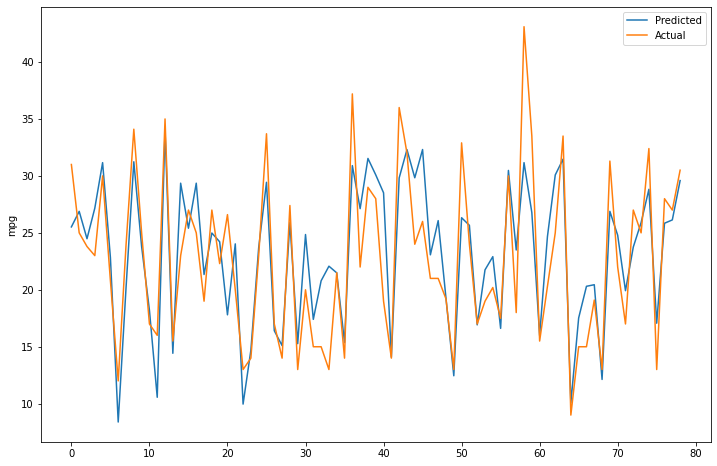

In [7]:
result_dict['mpg ~ single_linear'] = build_model(linear_reg,
                                                'mpg',
                                                ['weight'],
                                                automobile_df,
                                                show_plot_Y=True)

Training_score:  0.7214398519519305
Test_score:  0.6521323805895409


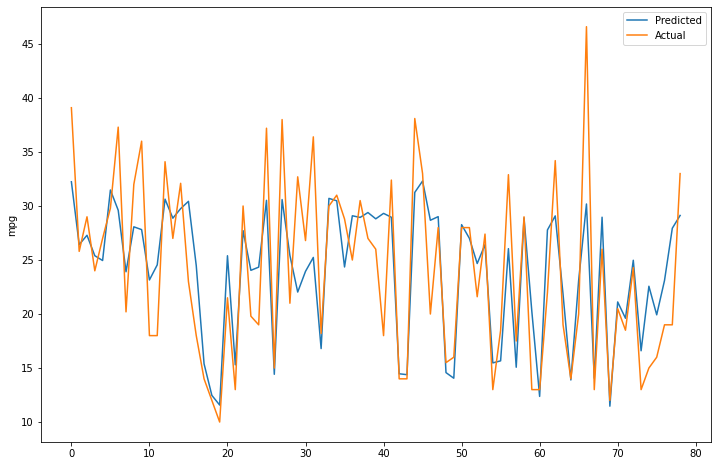

In [8]:
result_dict['mpg ~ kitchen_sink_linear'] = build_model(linear_reg,
                                                'mpg',
                                                ['cylinders',
                                                 'displacement',
                                                 'horsepower',
                                                 'weight',
                                                 'acceleration'],
                                                automobile_df,
                                                show_plot_Y=True)

Training_score:  0.7186913597335025
Test_score:  0.6378894354073447


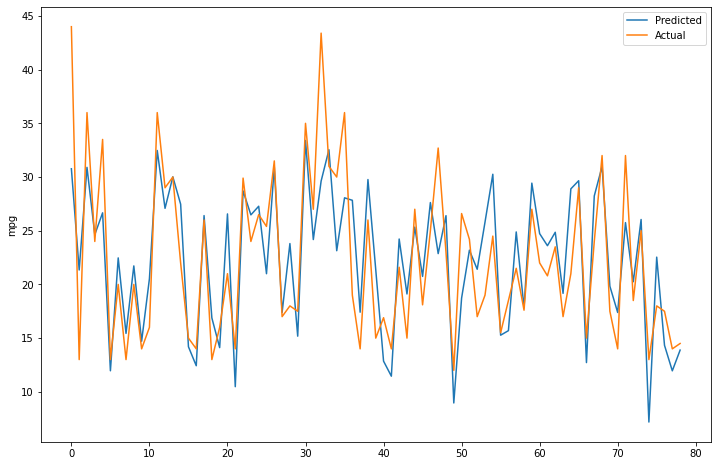

In [9]:
result_dict['mpg ~ parsimonius_linear'] = build_model(linear_reg,
                                                'mpg',
                                                 ['horsepower',
                                                 'weight'],
                                                automobile_df,
                                                show_plot_Y=True)

In [10]:
compare_results()

Regression: mpg ~ single_linear
Training score 0.6900852221213631
Test score 0.6993377498797744

Regression: mpg ~ kitchen_sink_linear
Training score 0.7214398519519305
Test score 0.6521323805895409

Regression: mpg ~ parsimonius_linear
Training score 0.7186913597335025
Test score 0.6378894354073447



In [11]:
def lasso_reg(x_train, y_train, alpha=0.5):
    model = Lasso(alpha=alpha)
    model.fit(x_train, y_train)
    
    return model

Training_score:  0.7089607655768747
Test_score:  0.6850311651355043


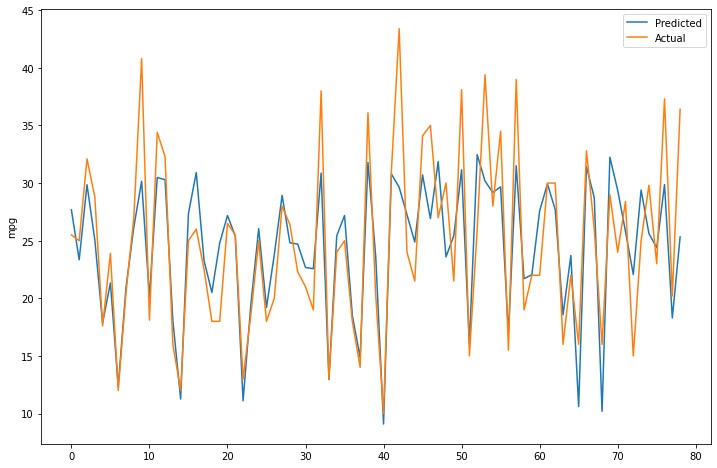

In [12]:
result_dict['mpg ~ kitchen_sink_lasso'] = build_model(lasso_reg,
                                                'mpg',
                                                ['cylinders',
                                                 'displacement',
                                                 'horsepower',
                                                 'weight',
                                                 'acceleration'],
                                                automobile_df,
                                                show_plot_Y=True)

In [13]:
compare_results()

Regression: mpg ~ single_linear
Training score 0.6900852221213631
Test score 0.6993377498797744

Regression: mpg ~ kitchen_sink_linear
Training score 0.7214398519519305
Test score 0.6521323805895409

Regression: mpg ~ parsimonius_linear
Training score 0.7186913597335025
Test score 0.6378894354073447

Regression: mpg ~ kitchen_sink_lasso
Training score 0.7089607655768747
Test score 0.6850311651355043



In [14]:
def ridge_reg(x_train, y_train, alpha=0.5, normalize=True):
    model = Ridge(alpha=alpha, normalize=normalize)
    model.fit(x_train, y_train)
    
    return model

Training_score:  0.6873396285171642
Test_score:  0.6929911167669215


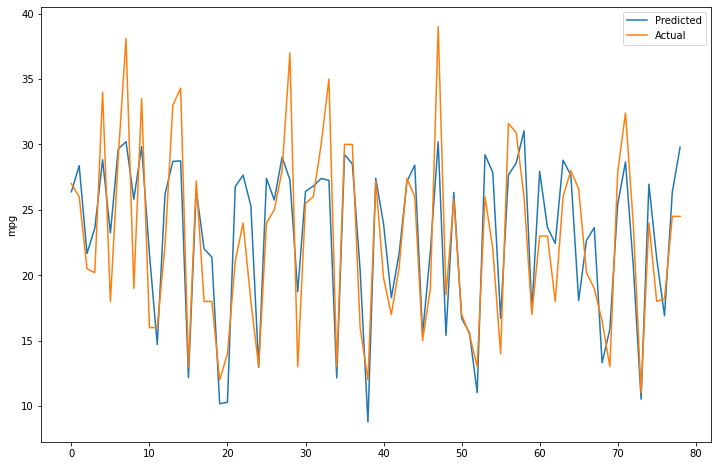

In [15]:
result_dict['mpg ~ kitchen_sink_ridge'] = build_model(ridge_reg,
                                                'mpg',
                                                ['cylinders',
                                                 'displacement',
                                                 'horsepower',
                                                 'weight',
                                                 'acceleration'],
                                                automobile_df,
                                                show_plot_Y=True)

In [16]:
compare_results()

Regression: mpg ~ single_linear
Training score 0.6900852221213631
Test score 0.6993377498797744

Regression: mpg ~ kitchen_sink_linear
Training score 0.7214398519519305
Test score 0.6521323805895409

Regression: mpg ~ parsimonius_linear
Training score 0.7186913597335025
Test score 0.6378894354073447

Regression: mpg ~ kitchen_sink_lasso
Training score 0.7089607655768747
Test score 0.6850311651355043

Regression: mpg ~ kitchen_sink_ridge
Training score 0.6873396285171642
Test score 0.6929911167669215



In [17]:
def elastic_net_reg(x_train, y_train, alpha=1, l1_ratio=0.5,
                   normalize=False, max_iter=100000, warm_start=True, equivalent_to="Elastic Net"):
    
    print("Equivalent to:", equivalent_to)
    
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio,
                      normalize=normalize, max_iter=max_iter, warm_start=warm_start)
    model.fit(x_train, y_train)
    
    return model

In [18]:
from functools import partial

Equivalent to: OLS
Training_score:  0.7265274475787423
Test_score:  0.5811776662287305


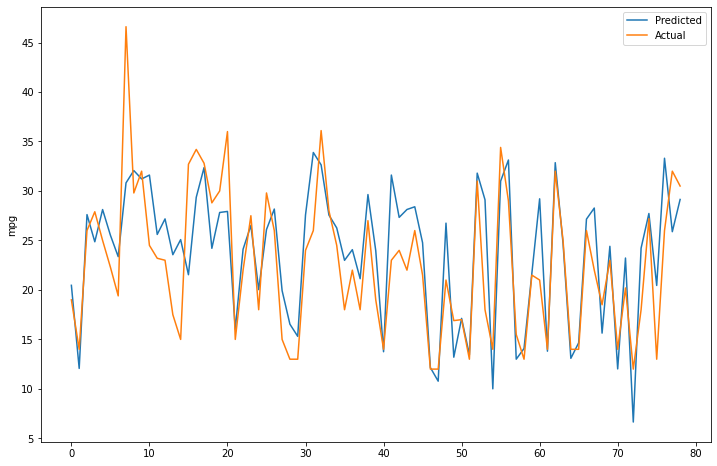

In [19]:
result_dict['mpg ~ kitchen_sink_elastic_net_ols'] = build_model(partial(elastic_net_reg,
                                                                       alpha=0, equivalent_to="OLS"),
                                                                'mpg',
                                                                ['cylinders',
                                                                 'displacement',
                                                                 'horsepower',
                                                                 'weight',
                                                                 'acceleration'],
                                                                  automobile_df,
                                                                  show_plot_Y=True)

Equivalent to: Lasso
Training_score:  0.7239617178777698
Test_score:  0.6361957848075445


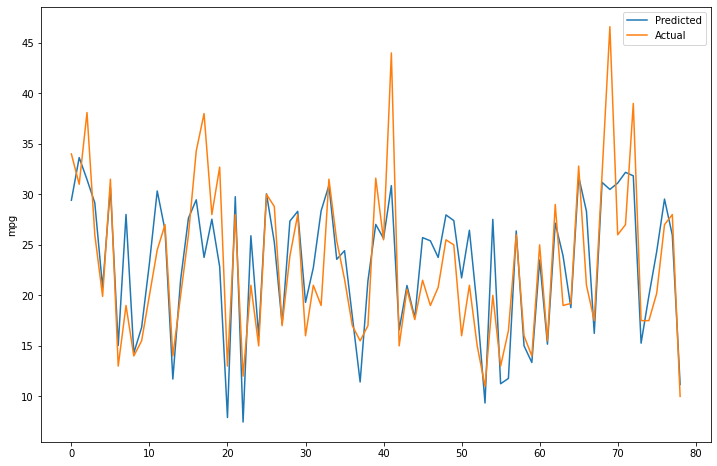

In [20]:
result_dict['mpg ~ kitchen_sink_elastic_net_lasso'] = build_model(partial(elastic_net_reg,
                                                                       alpha=1, l1_ratio=1, equivalent_to="Lasso"),
                                                                'mpg',
                                                                ['cylinders',
                                                                 'displacement',
                                                                 'horsepower',
                                                                 'weight',
                                                                 'acceleration'],
                                                                  automobile_df,
                                                                  show_plot_Y=True)

Equivalent to: Ridge
Training_score:  0.7020314114384825
Test_score:  0.7275425174489611


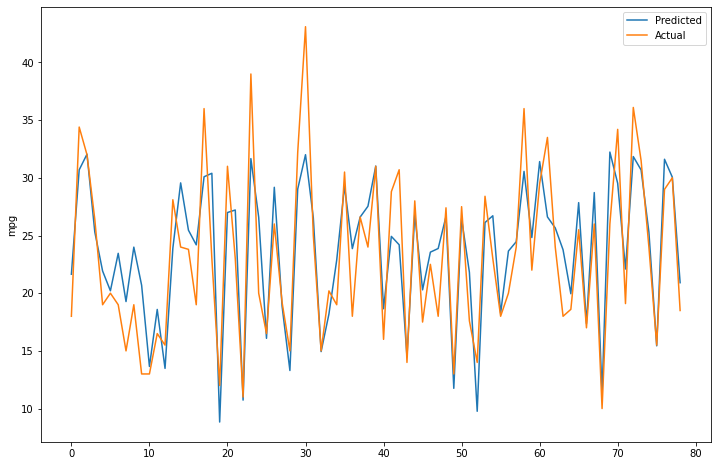

In [21]:
result_dict['mpg ~ kitchen_sink_elastic_net_ridge'] = build_model(partial(elastic_net_reg,
                                                                       alpha=1, l1_ratio=0, equivalent_to="Ridge"),
                                                                'mpg',
                                                                ['cylinders',
                                                                 'displacement',
                                                                 'horsepower',
                                                                 'weight',
                                                                 'acceleration'],
                                                                  automobile_df,
                                                                  show_plot_Y=True)

Equivalent to: Elastic Net
Training_score:  0.7066961731593815
Test_score:  0.698531791109958


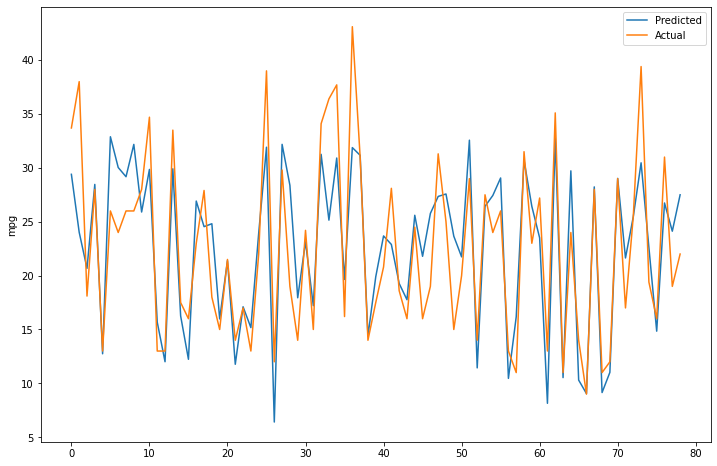

In [22]:
result_dict['mpg ~ kitchen_sink_elastic_net'] = build_model(partial(elastic_net_reg,
                                                                       alpha=1, l1_ratio=0.5),
                                                                'mpg',
                                                                ['cylinders',
                                                                 'displacement',
                                                                 'horsepower',
                                                                 'weight',
                                                                 'acceleration'],
                                                                  automobile_df,
                                                                  show_plot_Y=True)

In [23]:
compare_results()

Regression: mpg ~ single_linear
Training score 0.6900852221213631
Test score 0.6993377498797744

Regression: mpg ~ kitchen_sink_linear
Training score 0.7214398519519305
Test score 0.6521323805895409

Regression: mpg ~ parsimonius_linear
Training score 0.7186913597335025
Test score 0.6378894354073447

Regression: mpg ~ kitchen_sink_lasso
Training score 0.7089607655768747
Test score 0.6850311651355043

Regression: mpg ~ kitchen_sink_ridge
Training score 0.6873396285171642
Test score 0.6929911167669215

Regression: mpg ~ kitchen_sink_elastic_net_ols
Training score 0.7265274475787423
Test score 0.5811776662287305

Regression: mpg ~ kitchen_sink_elastic_net_lasso
Training score 0.7239617178777698
Test score 0.6361957848075445

Regression: mpg ~ kitchen_sink_elastic_net_ridge
Training score 0.7020314114384825
Test score 0.7275425174489611

Regression: mpg ~ kitchen_sink_elastic_net
Training score 0.7066961731593815
Test score 0.698531791109958



In [24]:
automobile_df.shape

(392, 7)

In [25]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
95,24.0,4,90.0,75,2108,15.5,46
256,19.2,8,305.0,145,3425,13.2,42
138,29.0,4,98.0,83,2219,16.5,46
55,22.0,6,146.0,97,2815,14.5,43
197,25.0,4,116.0,81,2220,16.9,44


In [26]:
def svr_reg(x_train, y_train, kernel='linear', epsilon=0.05, C=0.3):
    model = SVR(kernel=kernel, epsilon=epsilon, C=C)
    model.fit(x_train, y_train)
    
    return model

Training_score:  0.6805103062056637
Test_score:  0.6638367488490133


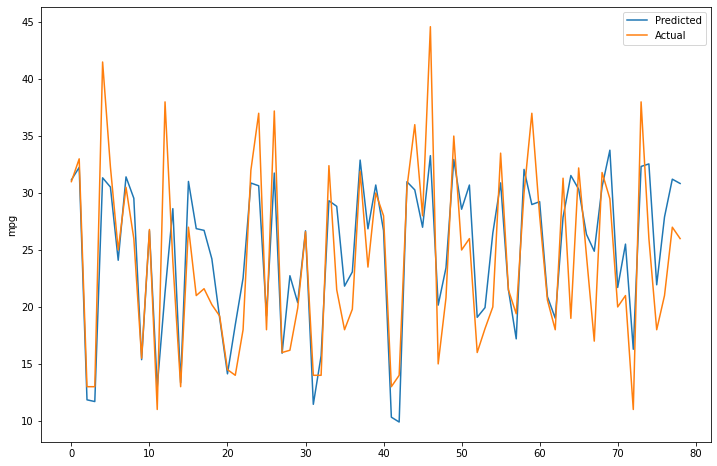

In [27]:
result_dict['mpg ~ kitchen_sink_svr'] = build_model(svr_reg,
                                                                'mpg',
                                                                ['cylinders',
                                                                 'displacement',
                                                                 'horsepower',
                                                                 'weight',
                                                                 'acceleration'],
                                                                  automobile_df,
                                                                  show_plot_Y=True)

In [28]:
compare_results()

Regression: mpg ~ single_linear
Training score 0.6900852221213631
Test score 0.6993377498797744

Regression: mpg ~ kitchen_sink_linear
Training score 0.7214398519519305
Test score 0.6521323805895409

Regression: mpg ~ parsimonius_linear
Training score 0.7186913597335025
Test score 0.6378894354073447

Regression: mpg ~ kitchen_sink_lasso
Training score 0.7089607655768747
Test score 0.6850311651355043

Regression: mpg ~ kitchen_sink_ridge
Training score 0.6873396285171642
Test score 0.6929911167669215

Regression: mpg ~ kitchen_sink_elastic_net_ols
Training score 0.7265274475787423
Test score 0.5811776662287305

Regression: mpg ~ kitchen_sink_elastic_net_lasso
Training score 0.7239617178777698
Test score 0.6361957848075445

Regression: mpg ~ kitchen_sink_elastic_net_ridge
Training score 0.7020314114384825
Test score 0.7275425174489611

Regression: mpg ~ kitchen_sink_elastic_net
Training score 0.7066961731593815
Test score 0.698531791109958

Regression: mpg ~ kitchen_sink_svr
Training sco

In [29]:
def kneighbors_reg(x_train, y_train, n_neighbors=10):
    model = KNeighborsRegressor(n_neighbors = n_neighbors)
    model.fit(x_train, y_train)
    
    return model

Training_score:  0.7654641453976025
Test_score:  0.6791364769814798


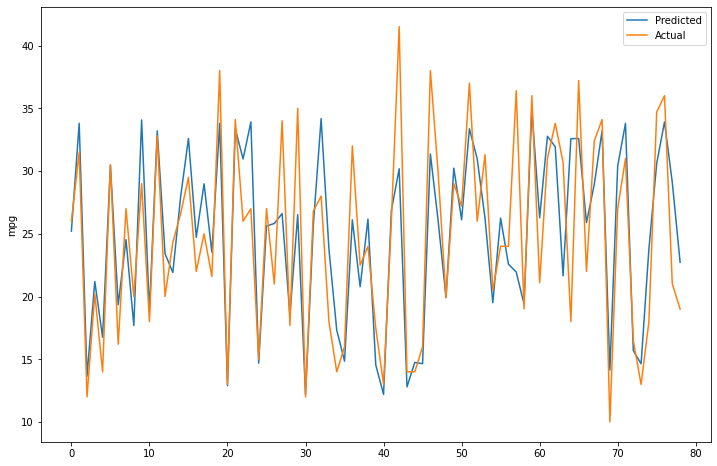

In [31]:
result_dict['mpg ~ kitchen_sink_kneighbors'] = build_model(kneighbors_reg,
                                                                'mpg',
                                                                ['cylinders',
                                                                 'displacement',
                                                                 'horsepower',
                                                                 'weight',
                                                                 'acceleration'],
                                                                  automobile_df,
                                                                  show_plot_Y=True)

In [32]:
compare_results()

Regression: mpg ~ single_linear
Training score 0.6900852221213631
Test score 0.6993377498797744

Regression: mpg ~ kitchen_sink_linear
Training score 0.7214398519519305
Test score 0.6521323805895409

Regression: mpg ~ parsimonius_linear
Training score 0.7186913597335025
Test score 0.6378894354073447

Regression: mpg ~ kitchen_sink_lasso
Training score 0.7089607655768747
Test score 0.6850311651355043

Regression: mpg ~ kitchen_sink_ridge
Training score 0.6873396285171642
Test score 0.6929911167669215

Regression: mpg ~ kitchen_sink_elastic_net_ols
Training score 0.7265274475787423
Test score 0.5811776662287305

Regression: mpg ~ kitchen_sink_elastic_net_lasso
Training score 0.7239617178777698
Test score 0.6361957848075445

Regression: mpg ~ kitchen_sink_elastic_net_ridge
Training score 0.7020314114384825
Test score 0.7275425174489611

Regression: mpg ~ kitchen_sink_elastic_net
Training score 0.7066961731593815
Test score 0.698531791109958

Regression: mpg ~ kitchen_sink_svr
Training sco

In [33]:
def apply_standard_scaler(x):
    scaler = StandardScaler()
    scaler.fit(x)
    
    return scaler.transform(x)

In [34]:
def sgd_reg(x_train, y_train, max_iter=10000, tol=1e-3):
    model = SGDRegressor(max_iter=max_iter, tol=tol)
    model.fit(x_train, y_train)
    
    return model

Training_score:  0.700606311518855
Test_score:  0.7283006065682455


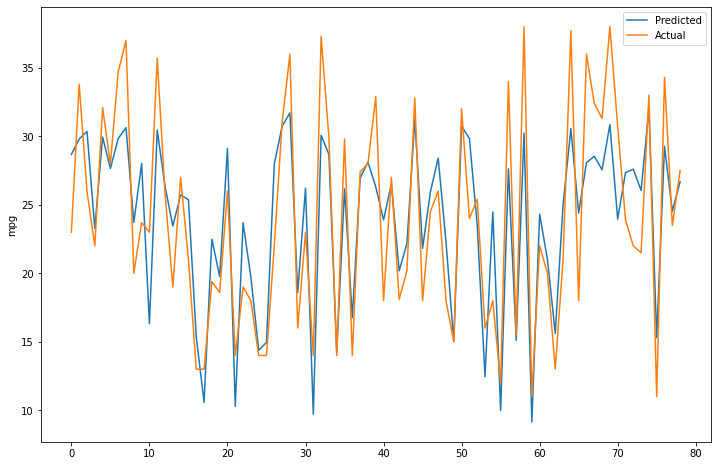

In [35]:
result_dict['mpg ~ kitchen_sink_sgd'] = build_model(sgd_reg,
                                                                'mpg',
                                                                ['cylinders',
                                                                 'displacement',
                                                                 'horsepower',
                                                                 'weight',
                                                                 'acceleration'],
                                                                  automobile_df,
                                                                  show_plot_Y=True,
                                                                   preprocess_fn=apply_standard_scaler)

In [36]:
def decision_tree_reg(x_train, y_train, max_depth=2):
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(x_train, y_train)
    
    return model

Training_score:  0.7333236449441833
Test_score:  0.7146831315548892


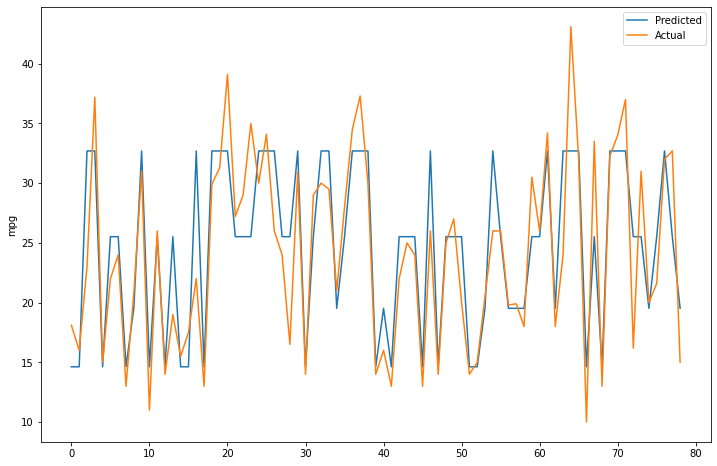

In [37]:
result_dict['mpg ~ kitchen_sink_decision_tree'] = build_model(decision_tree_reg,
                                                                'mpg',
                                                                ['cylinders',
                                                                 'displacement',
                                                                 'horsepower',
                                                                 'weight',
                                                                 'acceleration'],
                                                                  automobile_df,
                                                                  show_plot_Y=True)

In [38]:
def lars_reg(x_train, y_train, n_nonzero_coefs=4):
    model = Lars(n_nonzero_coefs=n_nonzero_coefs)
    model.fit(x_train, y_train)
    
    return model

Training_score:  0.7161341383199068
Test_score:  0.658529746714426


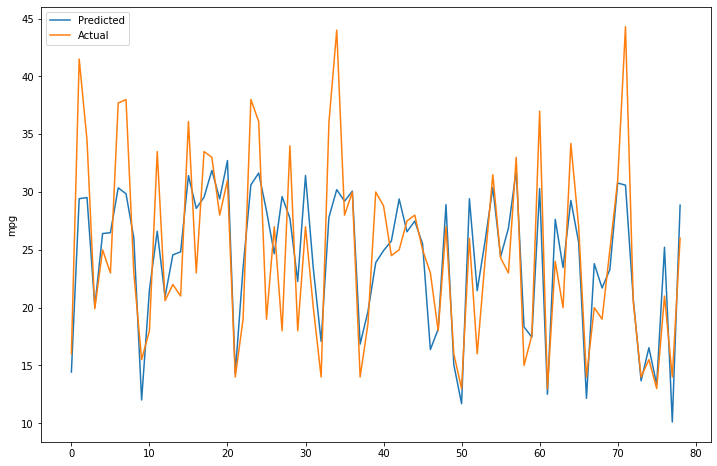

In [39]:
result_dict['mpg ~ kitchen_sink_lars'] = build_model(lars_reg,
                                                                'mpg',
                                                                ['cylinders',
                                                                 'displacement',
                                                                 'horsepower',
                                                                 'weight',
                                                                 'acceleration'],
                                                                  automobile_df,
                                                                  show_plot_Y=True)